# <center> Postgress Connector </center>

### Import Preliminaries

In [1]:
# Import Module
import psycopg2

In [2]:
# Import Postgress Connector
conn = psycopg2.connect(
    host='localhost',
    port=54320, #5432 will also work
    dbname='my_database',
    user='postgres',
)

In [3]:
# Open connection, create table, insert data, select data, print result, close connection
cur = conn.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS test (id serial PRIMARY KEY, num integer, data varchar);")
cur.execute("INSERT INTO test (num, data) VALUES (%s, %s)", (100, "abcdef"))
cur.execute("SELECT * FROM test;")
result = cur.fetchone()
print(result)
conn.commit()
cur.close()
conn.close()

(1, 100, 'abcdef')


## <center> Pandas Connector </center>

### Import Modules

In [4]:
import pandas as pd
from sqlalchemy import create_engine

### Query to DataFrame

In [5]:
engine = create_engine('postgresql://postgres@localhost:54320/my_database')

# Query portgress database into 
df = pd.read_sql_query('SELECT * FROM "test"',con=engine)

# View the head of the dataframe
df.head()

,id,num,data
0,1,100,abcdef
1,2,100,abcdef
2,3,100,abcdef
3,4,100,abcdef
4,5,100,abcdef


### DataFrame to Table

In [6]:
df = pd.DataFrame({'Index':[1,2,3,4,5,6,7,8],
                  'Name': ['A','B','C','D','E','F','G','H'],
                  'Grade': ['A','B','C','D','A','A','A','F']})
df.head(n=10)

,Index,Name,Grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,D,D
4,5,E,A
5,6,F,A
6,7,G,A
7,8,H,F


In [7]:
table_name = 'letter_grades'
df.to_sql(table_name,con=engine, if_exists='replace', index=False)

In [8]:
# Query portgress database into 
lg_df = pd.read_sql_query('SELECT * FROM "letter_grades"',con=engine)

# View the head of the dataframe
lg_df.head(n=10)

,Index,Name,Grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,D,D
4,5,E,A
5,6,F,A
6,7,G,A
7,8,H,F


### Chunksize Testing

In [29]:
lg_df_list = []
for i in range(100000):
    lg_df_list.append(lg_df)
    
lg_max_df = pd.concat(lg_df_list)
lg_max_df = lg_max_df.reset_index()
lg_max_df.tail(10)

,index,Index,Name,Grade
799990,6,7,G,A
799991,7,8,H,F
799992,0,1,A,A
799993,1,2,B,B
799994,2,3,C,C
799995,3,4,D,D
799996,4,5,E,A
799997,5,6,F,A
799998,6,7,G,A
799999,7,8,H,F


In [30]:
import time
import matplotlib.pyplot as plt

In [31]:
chuncksizes = []
time_length = []
for i in range(1,100000,500):
    start_time = time.time()
    chuncksizes.append(i)
    engine = create_engine('postgresql://postgres@localhost:54320/my_database')
    table_name = 'letter_grades'
    df.to_sql(table_name,con=engine, if_exists='replace', index=False, chunksize=i)
    end_time = time.time()
    length =  end_time - start_time
    time_length.append(length)

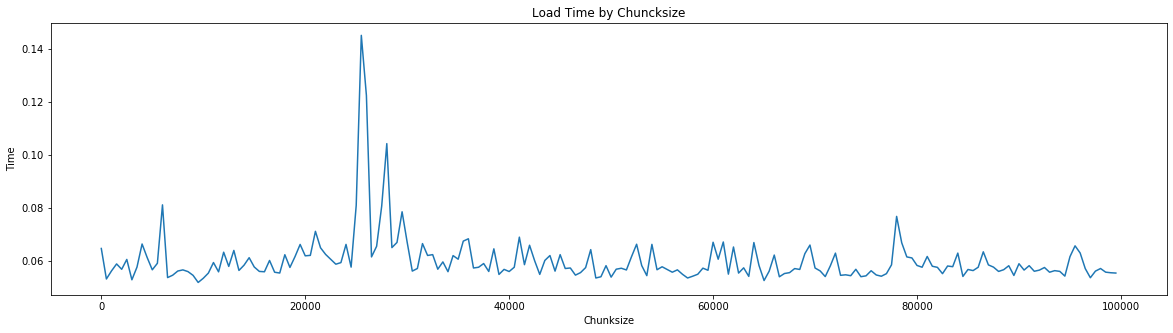

In [32]:
plt.figure(figsize=(20,5))
plt.plot(chuncksizes, time_length)
plt.title('Load Time by Chuncksize')
plt.ylabel('Time')
plt.xlabel('Chunksize');

### Reference
- https://www.saltycrane.com/blog/2019/01/how-run-postgresql-docker-mac-local-development/